# Lecture 4.2: Visualization

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for this lecture:**
* Learn more about exploratory data analysis
    
This lecture note corresponds to Chapter 7 of your book.
</div>



# Visualizing Distributions

In [7]:
#options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The file `bil.RData` contains a dataset on [billionaires](https://think.cs.vt.edu/corgis/csv/billionaires/billionaires.html): who they are, where they are from, how & when they made their fortune, etc.

In [8]:
load('bil.RData')
bil <- as_tibble(bil)
print(bil)
#print(bil)

# A tibble: 2,614 x 22
     age category citizenship company.name company.type `country code` founded
   <int> <chr>    <chr>       <chr>        <chr>        <chr>            <int>
 1    -1 Financi… Saudi Arab… Rolaco Trad… new          SAU               1968
 2    34 Financi… United Sta… Fidelity In… new          USA               1946
 3    59 Non-Tra… Brazil      Companhia B… new          BRA               1948
 4    61 New Sec… Germany     Ratiopharm   new          DEU               1881
 5    -1 Financi… Hong Kong   Swire        new          HKG               1816
 6    -1 Traded … Bahrain     YBA Kanoo    new          BHR               1890
 7    -1 New Sec… Japan       Otsuka Hold… new          JPN               1921
 8    -1 Traded … Japan       Sony         new          JPN               1946
 9    66 Financi… Japan       Mori Buildi… new          JPN               1959
10    -1 Traded … France      Chanel       new          FRA               1909
# … with 2,604 more rows, and

## Visualizing discrete distributions
We already saw how to visualize the distribution of a discrete random variable: make a bar plot. For example, in the `billionaire` data set, `region` is categorical:

In [9]:
count(bil, region)

region,n
<chr>,<int>
East Asia,535
Europe,698
Latin America,182
Middle East/North Africa,117
North America,992
South Asia,69
Sub-Saharan Africa,20
NA,1


Say we are interested in the distribution of `region`. We can plot a bar chart to visualize this:

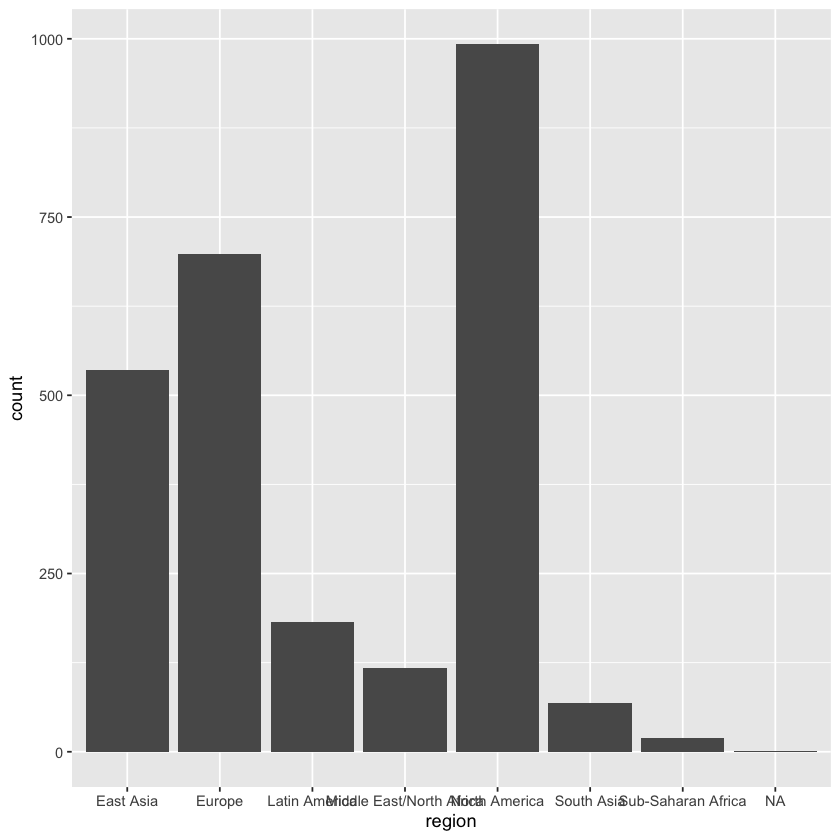

In [10]:
ggplot(data = bil) + geom_bar(mapping = aes(x = region))

## Continuous random variables
We cannot directly use a bar plot to visualize a continuous random variable, because every observation potentially has a different value. Instead we create a **histogram**. The command to do this is **geom_histogram**.

Let's visualize the distribution of wealth among billionaires. 

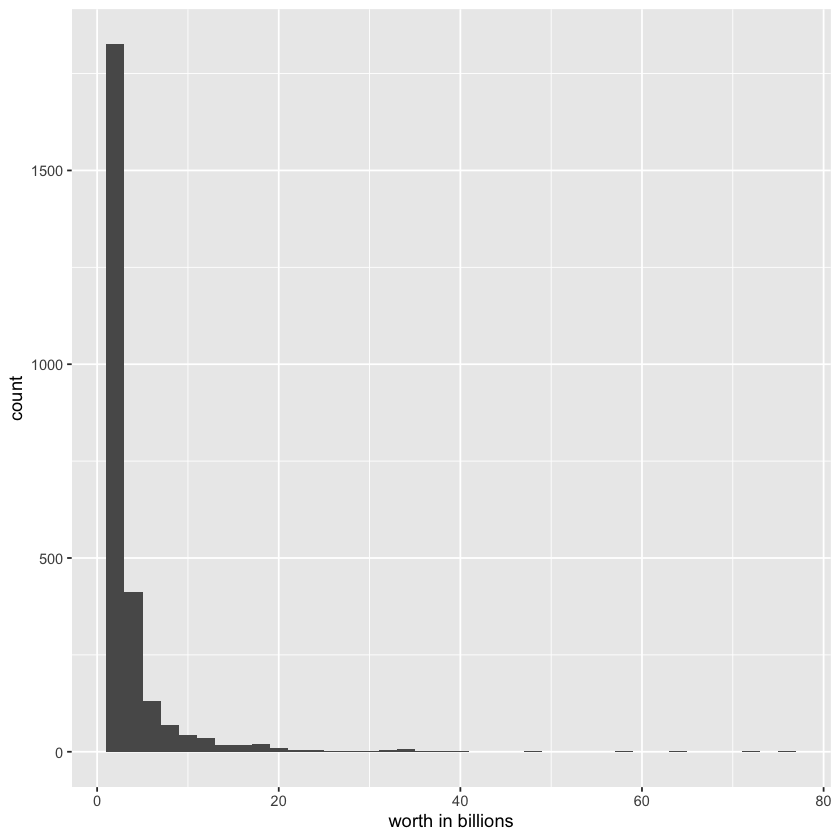

In [11]:
bil %>% ggplot +
    geom_histogram(mapping = aes(x = `worth in billions`), 
                   binwidth = 2)

Most billionaires are worth a paltry \\$1-5b. However, the distribution has a "long tail": there are some billionaires who are worth as much as \\$60-80b. Interestingly, the income distribution among billionaires looks quite a bit like the income distribution in society as a whole. Even the .001% have their 1%.

A histogram is basically a bar plot where the continuous random variable has been *quantized* into one of a finite number of values.

## Typical and Atypical Values
In EDA, it is a good idea to try and get a sense of what constitutes a "typical" value in your data. Let's look at the disribution of the ages of billionaires:

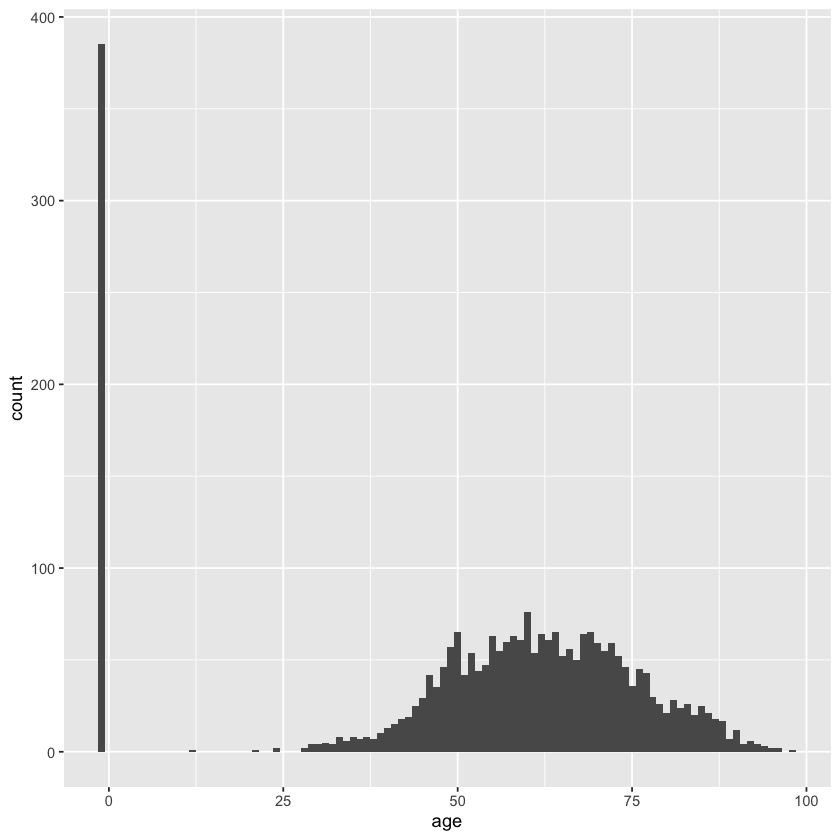

In [12]:
bil %>% mutate(age = ifelse(is.na(age), -1, age)) %>% ggplot() +
    geom_histogram(mapping = aes(x = age), binwidth = 1)

Typical values of `age` in these data range from about 30 to 90. We see a very unusual spike around zero. Let us try to investigate more by filtering the data set to contain only rows with age less than 10.   

In [13]:
filter(bil, age < 10) %>% arrange(age) %>% print

# A tibble: 385 x 22
     age category citizenship company.name company.type `country code` founded
   <int> <chr>    <chr>       <chr>        <chr>        <chr>            <int>
 1    -1 Financi… Saudi Arab… Rolaco Trad… new          SAU               1968
 2    -1 Financi… Hong Kong   Swire        new          HKG               1816
 3    -1 Traded … Bahrain     YBA Kanoo    new          BHR               1890
 4    -1 New Sec… Japan       Otsuka Hold… new          JPN               1921
 5    -1 Traded … Japan       Sony         new          JPN               1946
 6    -1 Traded … France      Chanel       new          FRA               1909
 7    -1 Non-Tra… Mexico      Groupo IUSA  new          MEX               1939
 8    -1 Financi… Mexico      Pulsar Inte… new          MEX               1981
 9    -1 Traded … Netherlands Heineken In… new          NLD               1864
10    -1 NA       United Sta… MBNA         subsidiary   USA               1982
# … with 375 more rows, and 15 

These represent missing data where we do not know the person's age. We'll fix this by *recoding* all values of -1 to `NA`:

In [15]:
 bil <- mutate(bil, age = na_if(age, -1))

The `na_if(a,b)` function as setting a to be equal to `NA` if `a==b`.

A good way to get a sense of typical values is by looking at percentiles. The $p$th percentile of a column is the number $x$ for which $p$% of the values are less than or equal to $x$. The best known example is the *median*: half the values are below the median.

In [17]:
q <- quantile(bil$age, probs=c(.01, .5, .99), na.rm=T)
print(q)

   1%   50%   99% 
32.28 62.00 90.00 


This tells us that 98% of the billionaires are between 32 and 90. Let us redo the visualization with extreme values filtered out.

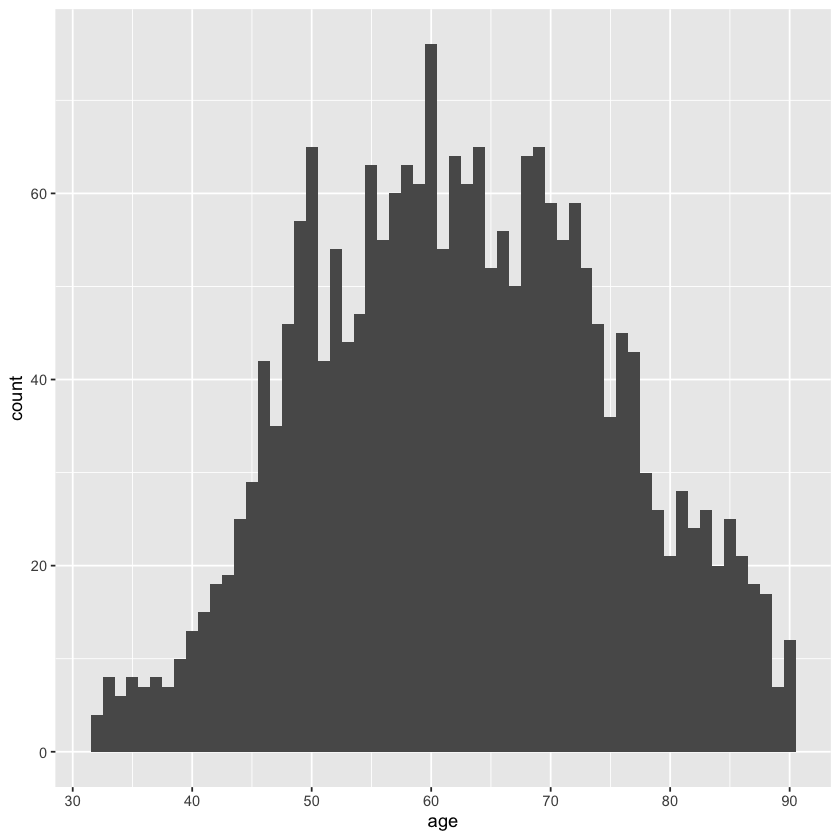

In [18]:
bil %>% mutate(age = ifelse(is.na(age), -1, age)) %>% filter(between(age,32,90))  %>%  ggplot() +
    geom_histogram(mapping = aes(x = age), binwidth = 1)

## Diamond pricing
Here is another example where EDA turns up something unexpected. Let's look at the distribution of `diamonds$carat`.

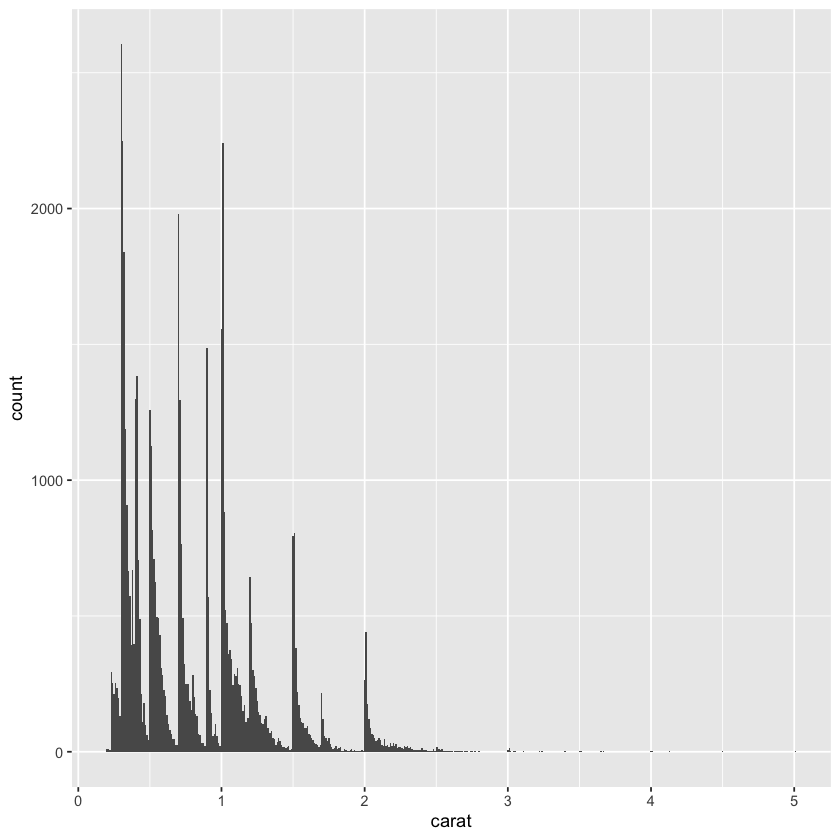

In [21]:
ggplot(data = diamonds) +
    geom_histogram(mapping = aes(x = carat), 
                   binwidth = .01)

What's going on near 3? Let us investigate...

In [22]:
filter(diamonds, carat > 3) %>% arrange(carat) %>% print

# A tibble: 32 x 10
   carat cut     color clarity depth table price     x     y     z
   <dbl> <ord>   <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  3.01 Premium I     I1       62.7    58  8040  9.1   8.97  5.67
 2  3.01 Premium F     I1       62.2    56  9925  9.24  9.13  5.73
 3  3.01 Fair    H     I1       56.1    62 10761  9.54  9.38  5.31
 4  3.01 Premium G     SI2      59.8    58 14220  9.44  9.37  5.62
 5  3.01 Ideal   J     SI2      61.7    58 16037  9.25  9.2   5.69
 6  3.01 Ideal   J     I1       65.4    60 16538  8.99  8.93  5.86
 7  3.01 Premium I     SI2      60.2    59 18242  9.36  9.31  5.62
 8  3.01 Fair    I     SI2      65.8    56 18242  8.99  8.94  5.9 
 9  3.01 Fair    I     SI2      65.8    56 18242  8.99  8.94  5.9 
10  3.01 Good    I     SI2      63.9    60 18242  9.06  9.01  5.77
# … with 22 more rows


Okay, now let us zoom into the **carat** range around 1.Okay, now let us zoom into the **carat** range around 1.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



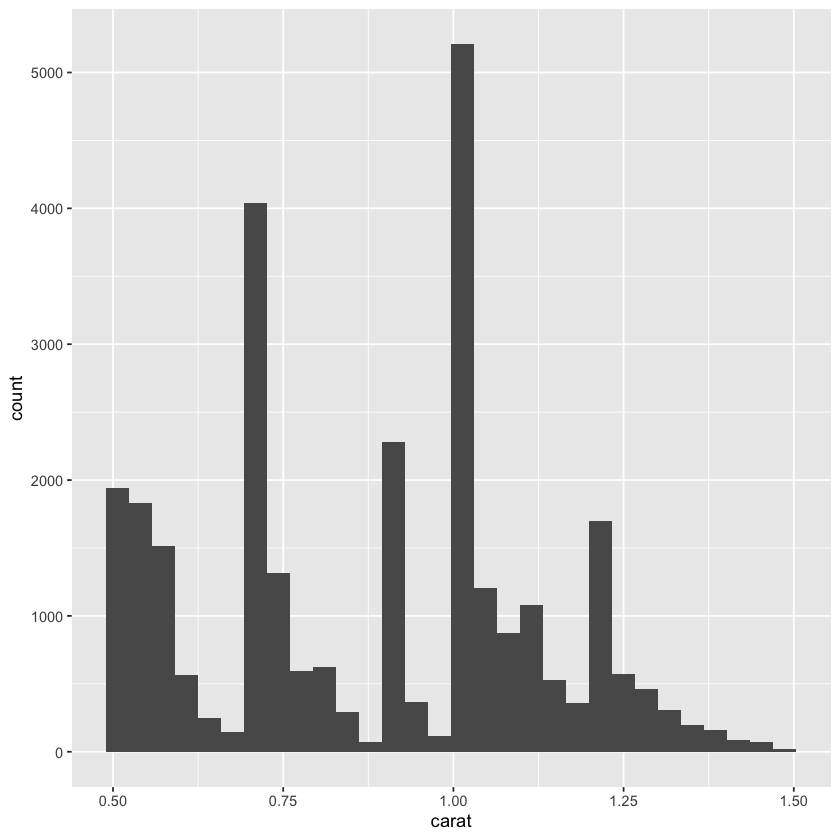

In [23]:
filter(diamonds, carat > 0.5, carat < 1.5) %>% 
    ggplot() + geom_histogram(mapping = aes(x = carat))

What might explain the strange histogram above? Tendency to round the **carat** values? It seems like certain values are particularly likely to be rounded. Let's refine the plot using the `breaks=` option to investigate further:

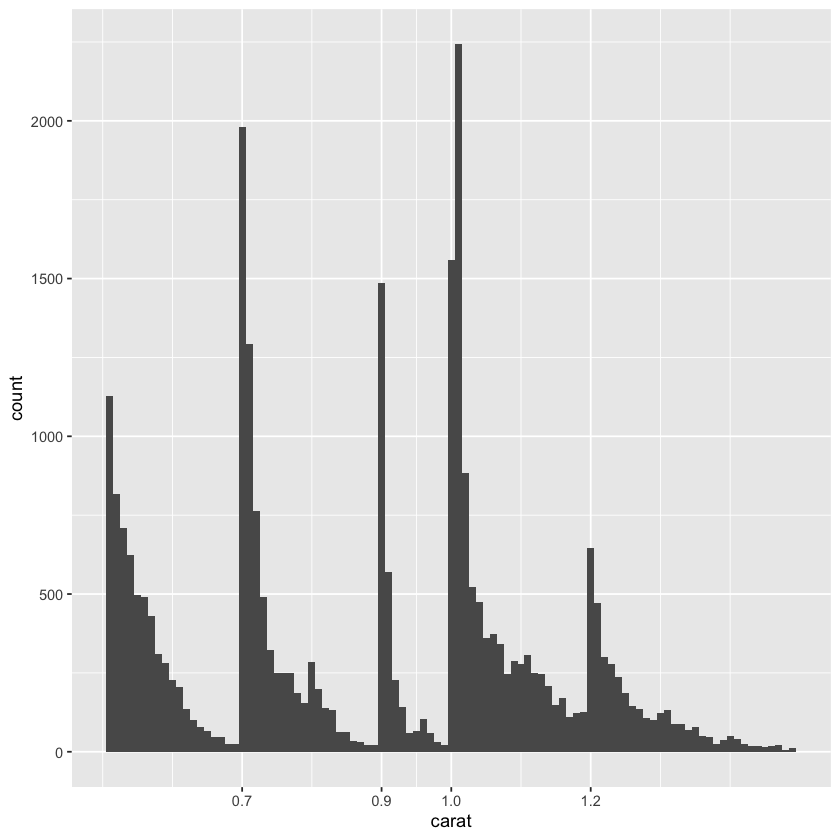

In [24]:
filter(diamonds, carat > 0.5, carat < 1.5) %>% ggplot() + geom_histogram(mapping = aes(x = carat), 
    binwidth = 0.01) + scale_x_continuous(breaks=c(.7,.9,1.,1.2))

Seems like certain carats are desired by people.  